# Исследование технологического процесса очистки золота

**Описание проекта:**

Строится модель машинного обучения для промышленной компании, разрабатывающая решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды на основе данных с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Цель:** оптимизация производства на основе выявления предприятий с убыточными характеристиками.


**Задача проекта:** спрогнозировать концентрацию золота при проведении процесса очистки золота.

Данные состоят из трех файлов:

* `gold_recovery_train_new.csv` - обучающая выборка;
* `gold_recovery_test_new.csv` - тестовая выборка;
* `gold_recovery_full_new.csv` - исходные данные.

**Исследование пройдёт в пять этапов:**

1. Подготовка данных.
2. Анализ данных.
3. Построение модели.
4. Тестирование лучшей модели.
5. Отчет.

## Подготовка данных

### Изучение данных из файлов

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor


In [44]:
gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', 
                         index_col='date', parse_dates = ['date'])
gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', 
                        index_col='date', parse_dates = ['date'])
gold_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', 
                        index_col='date', parse_dates = ['date'])

In [45]:
def name(gold):
    name = [x for x in globals() if globals()[x] is gold][0]
    return name

golds = [gold_train, gold_test, gold_full]
for gold in golds:
    print('Файл',name(gold), "\n")
    print('Сводная информация о таблице:', "\n")
    print(gold.info())
    print("\n", 'Первые пять строк таблицы:', "\n")
    display(gold.head())
    print("\n", 'Статистические данные:', "\n")
    display(gold.describe()) 
    print("\n", 'Дубликаты:', gold.duplicated().sum(), "\n")      

Файл gold_train 

Сводная информация о таблице: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  floa

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



 Статистические данные: 



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459



 Дубликаты: 0 

Файл gold_test 

Сводная информация о таблице: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-nul

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



 Статистические данные: 



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487



 Дубликаты: 0 

Файл gold_full 

Сводная информация о таблице: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               1943

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



 Статистические данные: 



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459



 Дубликаты: 0 



**Вывод** 

Представлено три файла с параметрами добычи и очистки золотосодержащей руды:
* Обучающая выборка
* Тестовая выборка
* Исходные данные

В каждом  файле содержатся пропущенные значения. Дубликаты не обнаружены.

Таблица gold_train (обучающая выборка) содержит 86 столбцов (тип данных float64) и 14149 строк.

Таблица gold_test (тестовая выборка) содержит 53 столбца (тип данных float64) и 5290 строк.

Таблица gold_full (исходные данные) содержит 87 столбцов (тип данных float64) и 19439 строк.

**Описание данных**

**Технологический процесс**
* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* Xanthate — ксантогенат (промотер, или активатор флотации);
* Sulphate — сульфат (на данном производстве сульфид натрия);
* Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

**Параметры этапов**

* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Возможные значения для блока [тип_параметра]:

* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

### Проверка рассчета эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. 

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

In [46]:
gold_train['recovery'] = (
                          (gold_train['rougher.output.concentrate_au'] * 
                          (gold_train['rougher.input.feed_au'] - 
                           gold_train['rougher.output.tail_au'])) / 
                          (gold_train['rougher.input.feed_au'] * 
                          (gold_train['rougher.output.concentrate_au'] - 
                           gold_train['rougher.output.tail_au'])) * 100
)

gold_train['recovery'].head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: recovery, dtype: float64

In [47]:
mean_absolute_error(gold_train['recovery'], gold_train['rougher.output.recovery'])

9.73512347450521e-15

Таким образом, МАЕ очень маленькое (порядка 10^-15), поэтому можно считать, что формула корректна.

### Анализ признаков, недоступных в тестовой выборке

Проведем анализ признаков, недоступных в тестовой выборке. 

In [48]:
difference_columns = list(set(gold_train.columns) - set(gold_test.columns))
difference_columns

['final.output.tail_au',
 'primary_cleaner.output.tail_au',
 'final.output.concentrate_sol',
 'secondary_cleaner.output.tail_au',
 'rougher.output.concentrate_sol',
 'final.output.concentrate_au',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.concentrate_au',
 'rougher.output.tail_pb',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'final.output.concentrate_ag',
 'rougher.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'final.output.concentrate_pb',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.tail_ag',
 'final.output.tail_sol',
 'final.output.recovery',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.concentrate_pb',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'final.output.tail_pb',
 'final.output.tail_ag',
 'rou

В **тестовой выборке** отсутствуют два типа параметров: 
* **output** (параметры продукта);
* **calculation** (расчётные характеристики).

**Общие** типы данных для обеих выборок: 
* **input** (параметры сырья); 
* **state** (параметры, характеризующие текущее состояние этапа).

### Предобработка данных

**Пропущенные значения.**

Обучающая и тестовая выборка имеют пропущенные значения. Так как, по условию технического задания, соседние по времени параметры часто похожи, то используем метод  ffill.

In [49]:
gold_train = gold_train.fillna(method='ffill')
gold_test = gold_test.fillna(method='ffill')

In [50]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                     

In [51]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

## Анализ данных

### Концентрация металлов на различных этапах очистки

Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

**Содержание золота**

In [52]:
gold = []
gold=pd.DataFrame(gold)
gold['rougher.input.feed_au']=gold_full['rougher.input.feed_au']
gold['rougher.output.concentrate_au']=gold_full['rougher.output.concentrate_au']
gold['primary_cleaner.output.concentrate_au']=gold_full['primary_cleaner.output.concentrate_au']
gold['final.output.concentrate_au']=gold_full['final.output.concentrate_au']


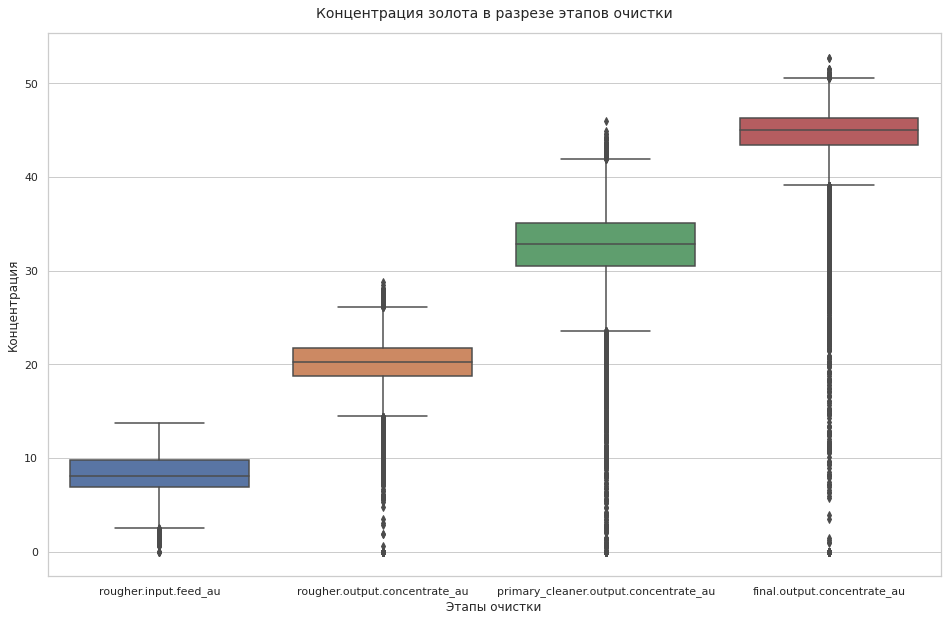

In [53]:
plt.figure(figsize=(16,10))
pc = sns.set(style="whitegrid")
pc = sns.boxplot(data=gold)
pc.axes.set_title("Концентрация золота в разрезе этапов очистки", fontsize=14, pad=15)
pc.set_xlabel("Этапы очистки", fontsize=12)
pc.set_ylabel("Концентрация", fontsize=12)
plt.show()

**Содержание серебра**

In [54]:
silver = []
silver=pd.DataFrame(silver)
silver['rougher.input.feed_ag']=gold_full['rougher.input.feed_ag']
silver['rougher.output.concentrate_ag']=gold_full['rougher.output.concentrate_ag']
silver['primary_cleaner.output.concentrate_ag']=gold_full['primary_cleaner.output.concentrate_ag']
silver['final.output.concentrate_ag']=gold_full['final.output.concentrate_ag']

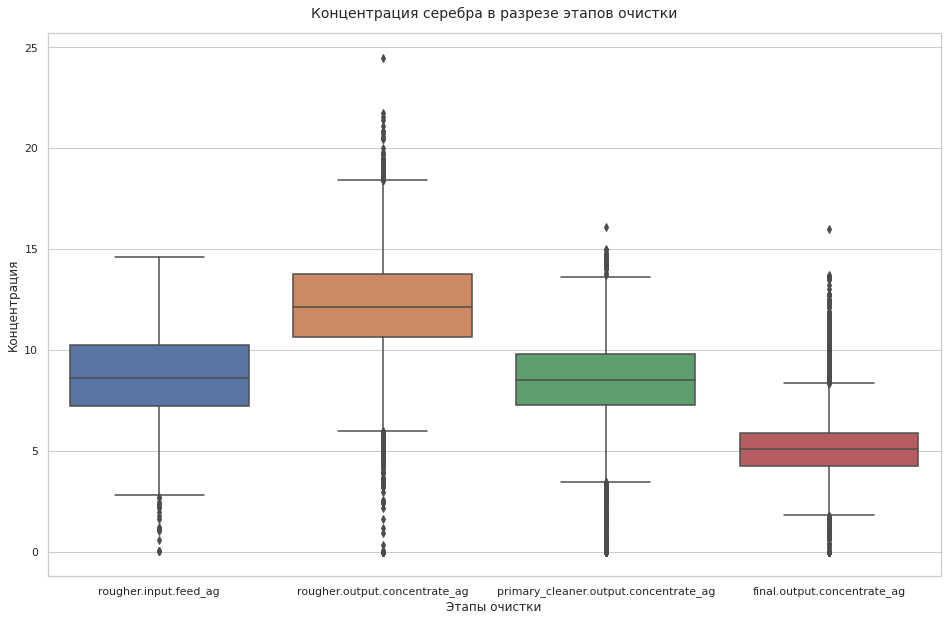

In [55]:
plt.figure(figsize=(16,10))
pc = sns.set(style="whitegrid")
pc = sns.boxplot(data=silver)
pc.axes.set_title("Концентрация серебра в разрезе этапов очистки", fontsize=14, pad=15)
pc.set_xlabel("Этапы очистки", fontsize=12)
pc.set_ylabel("Концентрация", fontsize=12)
plt.show()

**Содержание свинца**

In [56]:
plumbum = []
plumbum=pd.DataFrame(plumbum)
plumbum['rougher.input.feed_pb']=gold_full['rougher.input.feed_pb']
plumbum['rougher.output.concentrate_pb']=gold_full['rougher.output.concentrate_pb']
plumbum['primary_cleaner.output.concentrate_pb']=gold_full['primary_cleaner.output.concentrate_pb']
plumbum['final.output.concentrate_pb']=gold_full['final.output.concentrate_pb']

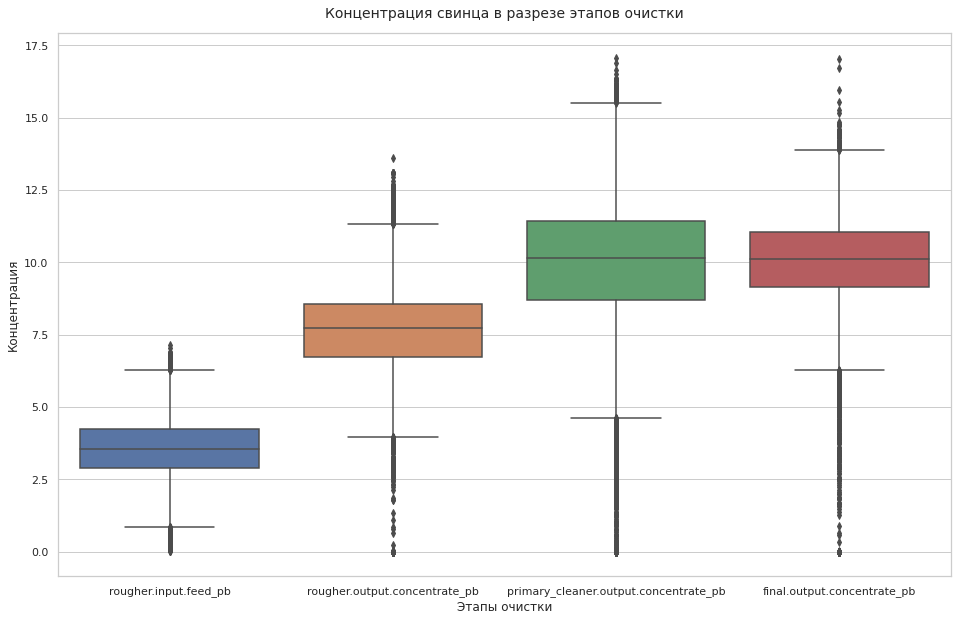

In [57]:
plt.figure(figsize=(16,10))
pc = sns.set(style="whitegrid")
pc = sns.boxplot(data=plumbum)
pc.axes.set_title("Концентрация свинца в разрезе этапов очистки", fontsize=14, pad=15)
pc.set_xlabel("Этапы очистки", fontsize=12)
pc.set_ylabel("Концентрация", fontsize=12)
plt.show()

**Вывод**:
* содержание золота стабильно увеличивается, но вместе с этим увеличиваются и выбросы;
* содержание серебра увеличилось в черновом концентрате по сравнению со смесью руды, но в дальнейшем его концентрация уменьшилась;
* содержание свинца постепенно увеличивалось.

###  Распределение размеров гранул сырья 

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

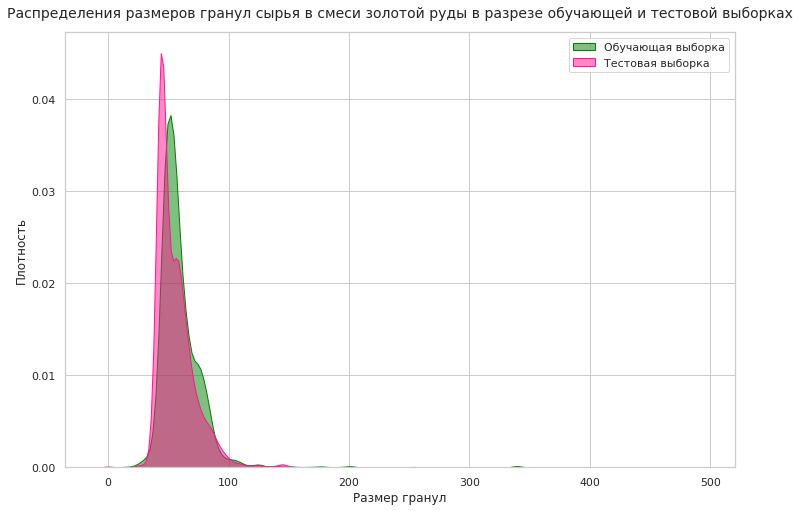

In [58]:
plt.figure(figsize=(12,8))
sns.kdeplot(gold_train['rougher.input.feed_size'], shade=True, color="green", label="Обучающая выборка", alpha=.5)
sns.kdeplot(gold_test['rougher.input.feed_size'], shade=True, color="deeppink", label="Тестовая выборка", alpha=.5)
plt.title('Распределения размеров гранул сырья в смеси золотой руды в разрезе обучающей и тестовой выборках', fontsize=14, pad=15)
plt.xlabel("Размер гранул", fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.legend()
plt.show()

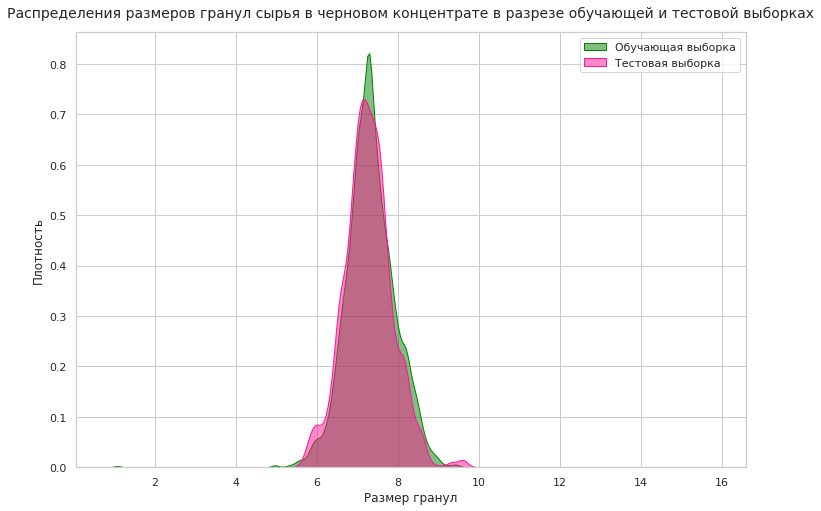

In [59]:
plt.figure(figsize=(12,8))
sns.kdeplot(gold_train['primary_cleaner.input.feed_size'], shade=True, color="green", label="Обучающая выборка", alpha=.5)
sns.kdeplot(gold_test['primary_cleaner.input.feed_size'], shade=True, color="deeppink", label="Тестовая выборка", alpha=.5)
plt.title('Распределения размеров гранул сырья в черновом концентрате в разрезе обучающей и тестовой выборках', fontsize=14, pad=15)
plt.xlabel("Размер гранул", fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.legend()
plt.show()

**Вывод:** распределения размеров гранул сырья на обучающей и тестовой выборках практически совпадают.

### Cуммарная концентрация всех веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [60]:
gold_train['rougher_input_feed_sum'] = gold_train['rougher.input.feed_ag'] + gold_train['rougher.input.feed_pb'] + gold_train['rougher.input.feed_sol'] + gold_train['rougher.input.feed_au']
gold_train['rougher_output_concentrate_sum'] = gold_train['rougher.output.concentrate_ag'] + gold_train['rougher.output.concentrate_pb'] + gold_train['rougher.output.concentrate_sol'] + gold_train['rougher.output.concentrate_au']
gold_train['primary_cleaner_output_concentrate_sum'] = gold_train['primary_cleaner.output.concentrate_ag'] + gold_train['primary_cleaner.output.concentrate_pb'] + gold_train['primary_cleaner.output.concentrate_sol'] + gold_train['primary_cleaner.output.concentrate_au']
gold_train['final_output_concentrate_sum'] = gold_train['final.output.concentrate_au'] + gold_train['final.output.concentrate_ag'] + gold_train['final.output.concentrate_pb'] + gold_train['final.output.concentrate_sol']


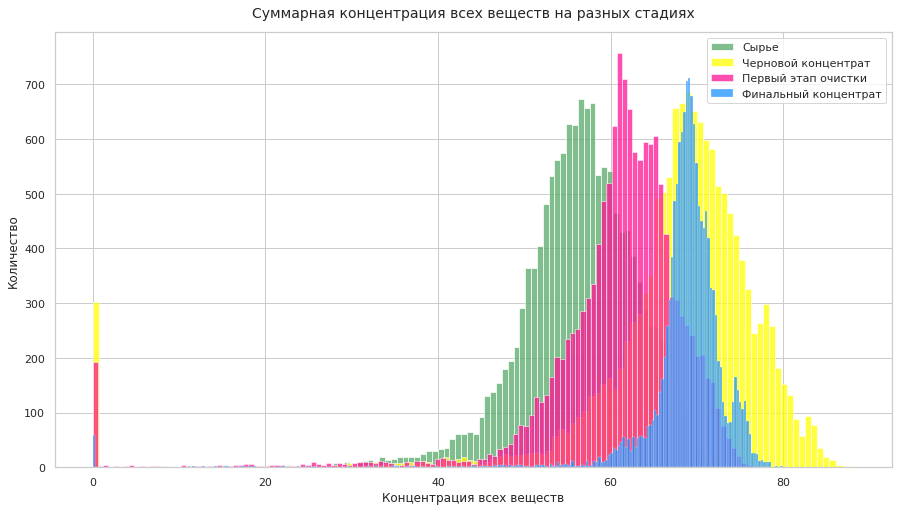

In [61]:
plt.figure(figsize=(15,8))
sns.histplot(gold_train['rougher_input_feed_sum'], label='Сырье', color="g")
sns.histplot(gold_train['rougher_output_concentrate_sum'], label='Черновой концентрат', color="yellow")
sns.histplot(gold_train['primary_cleaner_output_concentrate_sum'], color="deeppink",label='Первый этап очистки')
sns.histplot(gold_train['final_output_concentrate_sum'], color="dodgerblue",label='Финальный концентрат')

plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=14, pad=15)
plt.xlabel("Концентрация всех веществ", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.legend()
plt.show()

На графике наблюдаются аномальные значения в суммарной концентрации (пик при нуле), такие данные необходимо убрать. 

In [62]:
gold_train = gold_train.drop(gold_train.query('primary_cleaner_output_concentrate_sum == 0 or final_output_concentrate_sum == 0 or rougher_output_concentrate_sum == 0').index)

In [63]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13725 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         13725 non-null  float64
 1   final.output.concentrate_pb                         13725 non-null  float64
 2   final.output.concentrate_sol                        13725 non-null  float64
 3   final.output.concentrate_au                         13725 non-null  float64
 4   final.output.recovery                               13725 non-null  float64
 5   final.output.tail_ag                                13725 non-null  float64
 6   final.output.tail_pb                                13725 non-null  float64
 7   final.output.tail_sol                               13725 non-null  float64
 8   final.output.tail_au                     

## Построение модели

### Функция для вычисления sMAPE

Создадим функцию расчета метрики качества согласно условий проекта.

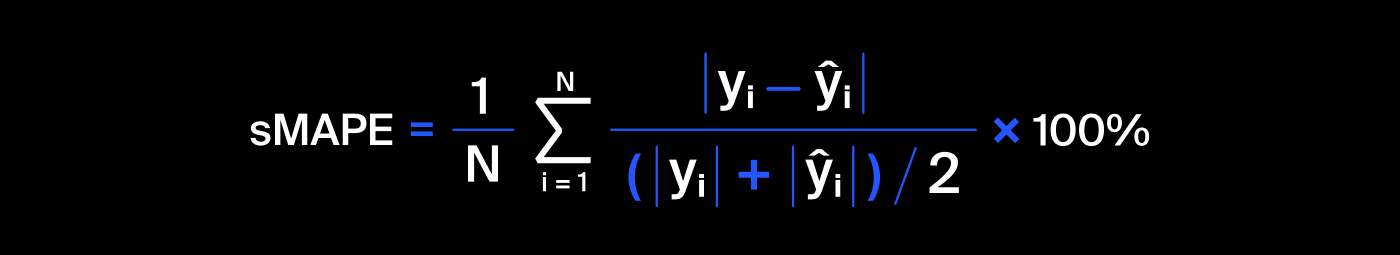

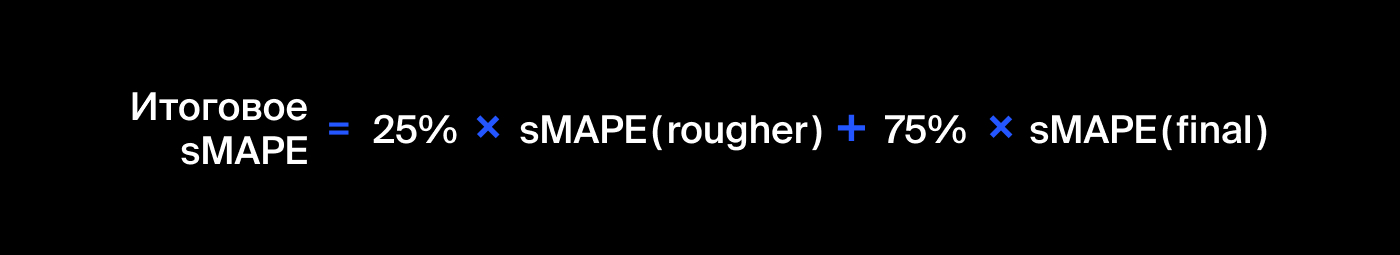

In [64]:
def smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [65]:
def final_smape(target, predictions):
    return 0.25 * smape(target.iloc[:,0], predictions[:,0]) + 0.75 * smape(target.iloc[:,1], predictions[:,1])

In [66]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)

### Выборка и масштабирование

In [67]:
diff_columns = list(set(gold_train.columns) - set(gold_test.columns))

In [68]:
gold_train = gold_train.drop(diff_columns, axis=1)


In [69]:
gold_train.head() 

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [70]:
gold_train = pd.merge(gold_train, gold_full[['rougher.output.recovery', 'final.output.recovery']],
                      left_index = True, right_index = True)
gold_test = pd.merge(gold_test, gold_full[['rougher.output.recovery', 'final.output.recovery']],
                      left_index = True, right_index = True)
gold_train.shape, gold_test.shape

((13725, 54), (5290, 54))

In [71]:
features_train = gold_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = gold_train[['rougher.output.recovery', 'final.output.recovery']]

features_test = gold_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = gold_test[['rougher.output.recovery', 'final.output.recovery']]

state = np.random.RandomState(12345)

**Масштабирование**

In [72]:
numeric = features_train.columns

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
print(features_train.shape)
print(features_test.shape)


(13725, 52)
(5290, 52)


### Обучение моделей и оценка их качества кросс-валидацией.

**Модель LinearRegression**

In [73]:
lr_model = LinearRegression()
lr_model.fit(features_train, target_train) 
final_score = np.mean(cross_val_score(lr_model, features_train, target_train, cv=5, scoring=smape_scorer))
print('Среднee значение sMAPE для модели LinearRegression:', final_score)



Среднee значение sMAPE для модели LinearRegression: -10.02932338763635


**Модель RandomForestRegressor**

In [74]:
rfr_model = RandomForestRegressor(random_state = state)

parametrs_rfr_model = {'n_estimators': range (5, 25, 2),
                      'max_depth': range (1, 11, 1)}

grid_rfr_model = GridSearchCV(rfr_model, parametrs_rfr_model,  cv=5, n_jobs=-1, scoring=smape_scorer)
grid_rfr_model.fit(features_train, target_train) 
print('Лучшее значение sMAPE для модели  RandomForestRegressor:', grid_rfr_model.best_score_,
     'с параметрами', grid_rfr_model.best_params_)

Лучшее значение sMAPE для модели  RandomForestRegressor: -8.715113697495243 с параметрами {'max_depth': 4, 'n_estimators': 9}


**Модель DecisionTreeRegressor**

In [75]:
dtr_model = DecisionTreeRegressor(random_state = state)

parametrs_dtr_model = {'max_depth': range (1, 20)}

grid_dtr_model = GridSearchCV(dtr_model, parametrs_dtr_model,  cv=5, n_jobs=-1, scoring=smape_scorer)
grid_dtr_model.fit(features_train, target_train) 
print('Лучшее значение sMAPE модели  "DecisionTreeRegressor":', grid_dtr_model.best_score_,
     'с параметрами', grid_dtr_model.best_params_)

Лучшее значение sMAPE модели  "DecisionTreeRegressor": -8.95861345893431 с параметрами {'max_depth': 1}


**Таким образом**, лучшее значение sMAPE у модели RandomForestRegressor: -8.715 с параметрами max_depth = 4 и n_estimators = 9. 

## Тестирование лучшей модели

**Проведем тестирование лучшей модели по результатам исследования: модель "RandomForestRegressor" с параметрами max_depth = 4 и n_estimators = 9.**

In [76]:
best_model = RandomForestRegressor(random_state = state, **grid_rfr_model.best_params_)
best_model.fit(features_train, target_train) 
predictions = best_model.predict(features_test)
best_model_score = final_smape(target_test, predictions)
print('sMAPE на тестовой выборке:', best_model_score)

sMAPE на тестовой выборке: 9.301520553475715


**Константная модель**

In [77]:
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(features_train, target_train) 
predictions = dummy_model.predict(features_test)
best_model_score = final_smape(target_test, predictions)
print('sMAPE константной модели:', best_model_score)

sMAPE константной модели: 9.831066377059802


## Отчет

**Описание проекта:**

Строится модель машинного обучения для промышленной компании, разрабатывающая решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды на основе данных с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Цель:** оптимизация производства на основе выявления предприятий с убыточными характеристиками.


**Задача проекта:** спрогнозировать концентрацию золота при проведении процесса очистки золота.

Данные состоят из трех файлов:

* `gold_recovery_train_new.csv` - обучающая выборка;
* `gold_recovery_test_new.csv` - тестовая выборка;
* `gold_recovery_full_new.csv` - исходные данные.

**Исследование происходило в несколько этапов:**

**1.Подготовка данных.**

Изучены четыре файла методами info(), head(), describe() и duplicated(). В каждом  файле содержатся пропущенные значения. Дубликаты не обнаружены.

* Таблица gold_train (обучающая выборка) содержит 86 столбцов (тип данных float64) и 14149 строк.
* Таблица gold_test (тестовая выборка) содержит 53 столбца (тип данных float64) и 5290 строк.
* Таблица gold_full (исходные данные) содержит 87 столбцов (тип данных float64) и 19439 строк.

Проведена проверка рассчета эффективности обогащения на обучающей выборке для признака rougher.output.recovery. MAE между моими расчётами и значением признака очень маленькое (порядка 10^-15), поэтому можно считать, что формула корректна.

Проведен анализ признаков, недоступных в тестовой выборке. 

В **тестовой выборке** отсутствуют два типа параметров: 
* **output** (параметры продукта);
* **calculation** (расчётные характеристики).

**Общие** типы данных для обеих выборок: 
* **input** (параметры сырья); 
* **state** (параметры, характеризующие текущее состояние этапа).

Проведена предобработка данных: так как обучающая и тестовая выборка имеют пропущенные значения, а по условию технического задания, соседние по времени параметры часто похожи, то заполнение значений осуществлялось с использованием метода ffill.


**2. Анализ данных.**

**Концентрация металлов на различных этапах очистки**

Проведен анализ изменения концентрации золота, серебра и свинца на различных этапах очистки:
* содержание золота стабильно увеличивается, но вместе с этим увеличиваются и выбросы;
* содержание серебра увеличилось в черновом концентрате по сравнению со смесью руды, но в дальнейшем его концентрация уменьшилась;
* содержание свинца постепенно увеличивалось.

**Распределение размеров гранул сырья**

Проведено сравнение распределения размеров гранул сырья на обучающей и тестовой выборках: размеров гранул сырья практически совпадают.

**Cуммарная концентрация всех веществ на разных стадиях**

Проведено исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
На графике обнаружились аномальные значения в суммарной концентрации (пик при нуле), поэтому такие данные были удалены.



**3. Построение модели**

**Функция для вычисления sMAPE**: создана функция расчета метрики качества согласно условий проекта.


**Выборка и масштабирование**: подготовлены обучающая и тестовая выборки, проведено масштабирование методом StandardScaler().

**Обучение моделей и оценка их качества кросс-валидацией**

Проведено обучение и анализ следующих моделей на обучающей выборке данных с подбором оптимальных гиперпараметров (GridSearchCV) и оценкой метрики качества с помощью кросс-валидации: `LinearRegression`, `RandomForestRegressor`, `DecisionTreeRegressor`. Лучшие результаты:
         
1. **Модель "LinearRegression":** 
* `метрика`: sMAPE = -10.03

2. **Модель "RandomForestRegressor":**
* `метрика`: sMAPE = -8.72
* `параметры`: max_depth = 4, n_estimators = 9.

3. **Модель "DecisionTreeRegressor":**
* `метрика`: sMAPE = -8.96
* `параметры`: max_depth = 1.

Таким образом, наилучшие значения ROC-AUC у модели `RandomForestRegressor` с параметрами: max_depth = 4, n_estimators = 9.

**4. Тестирование лучшей модели.**

Проведено тестирование лучшей модели `RandomForestRegressor` на тестовой выборке с параметрами:  max_depth = 4, n_estimators = 9 на тестовой выборке. 

Итоговое sMAPE на тестовой выборке: 9.3015

Итоговое sMAPE константной модели: 9.8311
